### 1. Bibliotheken importieren
Zuerst importieren wir die notwendigen Bibliotheken: pandas für die Datenmanipulation und matplotlib.pyplot sowie seaborn für die Visualisierung.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Einstellungen für schönere Plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6) # Standardgröße für Diagramme
plt.rcParams['figure.dpi'] = 100 # Höhere Auflösung für Diagramme

### 2. Daten laden
Wir laden den Datensatz aus einer CSV-Datei in einen Pandas DataFrame. Stellt sicher, dass die netflix.csv-Datei im selben Verzeichnis wie euer Notebook liegt, oder passt den Pfad entsprechend an.

In [9]:
# Pfad zur CSV-Datei
file_path = 'netflix.csv' # Annahme: Datei liegt im selben Ordner

# DataFrame erstellen
df = pd.read_csv(file_path)

print(f"Datensatz erfolgreich geladen. Anzahl der Zeilen: {df.shape[0]}, Anzahl der Spalten: {df.shape[1]}")

Datensatz erfolgreich geladen. Anzahl der Zeilen: 8807, Anzahl der Spalten: 12


### Aufgabe 1: Spalten anzeigen

**Frage:**  
Welche **Spalten (columns)** enthält der Datensatz?

**Beispiel-Code:**

```python
df.info


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### Aufgabe 2: Anzahl der Filme und Serien zählen
**Frage:**  

Wie viele **Filme** und **TV** Shows gibt es im Datensatz?

In [12]:
df['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

###  Aufgabe 3: Top 5 Länder mit den meisten Titeln

**Frage:**  
Aus welchen 5 Ländern stammen die meisten Titel?

**Hinweis:**  
Einige Einträge in der Spalte `country` enthalten mehrere Länder, getrennt durch Kommas  
(z. B. `"United States, Canada"`).  
Wir müssen diese aufteilen, bereinigen und anschließend zählen.

**Code-Erklärung:**

- `str.split(',')` → trennt Einträge mit mehreren Ländern (z. B. `"United States, Canada"`)
- `explode()` → macht aus Listen einzelne Zeilen (jede Zeile = 1 Land)
- `str.strip()` → entfernt Leerzeichen vor und nach dem Ländernamen
- `value_counts().head(5)` → zählt alle Länder und zeigt die **Top 5**


In [14]:
# Länder aufteilen und in eine lange Liste bringen
countries = df['country'].str.split(',').explode().str.strip()

# "Unbekannt" ausschließen
countries = countries[countries != "Unbekannt"]

# Top 5 Länder zählen
countries.value_counts().head(5)

country
United States     3690
India             1046
United Kingdom     806
Canada             445
France             393
Name: count, dtype: int64

###  Aufgabe 4: Veröffentlichungen im Jahr 2020

**Frage:**  
Wie viele Titel wurden im Jahr **2020** veröffentlicht?

**Hinweis:**  
Nutze die Spalte `release_year`, um nach dem Jahr **2020** zu filtern.


**Erklärung:**

- `df['release_year'] == 2020` → filtert alle Zeilen mit Veröffentlichungsjahr **2020**
- `.shape[0]` → gibt die Anzahl der Zeilen zurück, also die **Anzahl der Titel**

- `df[bedingung]` → filtert den DataFrame basierend auf einer Bedingung
- Beispiel: `df[df['release_year'] == 2020]`  
  → gibt alle Zeilen zurück, bei denen `release_year` gleich 2020 ist

In [15]:
df[df['release_year'] == 2020].shape[0]

953

### Aufgabe 5: Anzahl der Filme pro Jahr

**Frage:**  
Wie viele **Filme** wurden pro Jahr veröffentlicht?

**Hinweis:**  
Filtere zuerst nur die Zeilen, bei denen `type == 'Movie'`.  
Gruppiere dann nach `release_year`.  
Zähle die Einträge pro Jahr.

**Tipp:**  
Verwende z. B. `value_counts()` oder `groupby()` mit `size()` bzw. `count()`.

**Einfacher Code:**

```python
df[df['type'] == 'Movie']['release_year'].value_counts().sort_index()



In [16]:
df[df['type'] == 'Movie'].groupby('release_year').size()

release_year
1942      2
1943      3
1944      3
1945      3
1946      1
       ... 
2017    767
2018    767
2019    633
2020    517
2021    277
Length: 73, dtype: int64

### Aufgabe 6: Filme und Serien: Balkendiagramm

**Frage:**  
Wie ist die Verteilung von **Filmen** und **Serien** auf Netflix?

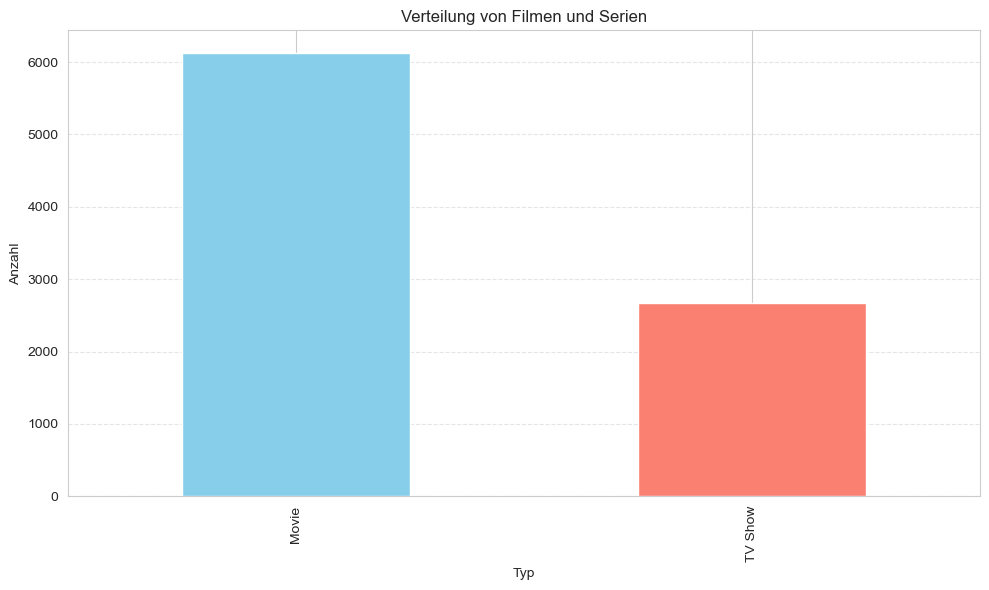

In [17]:
import matplotlib.pyplot as plt

# Zählt, wie oft jeder Typ vorkommt (z. B. Movie, TV Show)
type_counts = df['type'].value_counts()

# Balkendiagramm mit zwei Farben
type_counts.plot(kind='bar', color=['skyblue', 'salmon'])

# Diagrammtitel und Achsenbeschriftungen
plt.title('Verteilung von Filmen und Serien')
plt.xlabel('Typ')
plt.ylabel('Anzahl')

# Horizontale Hilfslinien zur besseren Lesbarkeit
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Layout optimieren
plt.tight_layout()

# Diagramm anzeigen
plt.show()

### Aufgabe 7: Meistverwendete Altersfreigabe

**Frage:**  
Welche Altersfreigabe (`rating`) kommt am häufigsten im Datensatz vor?

**Tipp:**  
Nutze:

```python
df['rating'].value_counts().head(1)

In [18]:
df['rating'].value_counts().head(1)

rating
TV-MA    3207
Name: count, dtype: int64

###  Aufgabe 8: Seltenste Altersfreigabe

**Frage:**  
Welche Altersfreigabe (`rating`) kommt am seltensten im Datensatz vor?

**Tipp:**  

💡 Falls du mehrere seltenste Werte sehen willst (z. B. die letzten 3),
 kannst du .tail(3) verwenden.

```python
df['rating'].value_counts().tail(1)

In [19]:
df['rating'].value_counts().tail(1)

rating
66 min    1
Name: count, dtype: int64

### Aufgabe 9: Alle Serien aus Deutschland

**Frage:**  
Zeige alle Serien (`type == 'TV Show'`), bei denen das Land Germany ist.

**Tipp:**  
- `country` kann mehrere Länder enthalten (z. B. "Germany, United States")  
- Mit `str.contains('Germany')` prüfst du, ob "Germany" im Text vorkommt.  
- Mit `na=False` werden fehlende Werte (`NaN`) als `False` behandelt.  
  Beispiel: `['Germany', NaN, 'France']` → `[True, False, False]`

**Lösungsidee:**  
```python
df[(df['type'] == 'TV Show') & (df['country'].str.contains('Germany', na=False))]

In [20]:
df[(df['type'] == 'TV Show') & (df['country'].str.contains('Germany', na=False))]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
385,s386,TV Show,How to Sell Drugs Online (Fast),NaN,"Maximilian Mundt, Danilo Kamperidis, Lena Klen...",Germany,"July 27, 2021",2021,TV-MA,3 Seasons,"Crime TV Shows, International TV Shows, TV Com...","To win back his ex-girlfriend, a nerdy teen st..."
478,s479,TV Show,Biohackers,NaN,"Luna Wedler, Jessica Schwarz, Adrian Julius Ti...",Germany,"July 9, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",A medical student enters a top German universi...
540,s541,TV Show,The Worst Witch,NaN,"Bella Ramsey, Clare Higgins, Meibh Campbell, R...","United Kingdom, Germany","July 6, 2021",2020,TV-G,4 Seasons,"British TV Shows, Kids' TV","After stumbling into a school for witches, a b..."
565,s566,TV Show,Bureau of Magical Things,NaN,"Kimie Tsukakoshi, Elizabeth Cullen, Mia Milnes...","Australia, Germany","July 1, 2021",2020,TV-G,1 Season,"International TV Shows, Kids' TV, TV Mysteries",When a teen accidentally discovers an enchante...
665,s666,TV Show,Deadwind,NaN,"Pihla Viitala, Lauri Tilkanen, Jani Volanen, T...","Finland, Germany","June 19, 2021",2020,TV-MA,2 Seasons,"Crime TV Shows, International TV Shows, TV Dramas","Just months after a tragic loss, detective Sof..."
1123,s1124,TV Show,Magical Andes,NaN,NaN,"Uruguay, Germany","April 1, 2021",2021,TV-G,2 Seasons,"Docuseries, International TV Shows, Science & ...","From Argentina to Colombia, this stunning docu..."
1226,s1227,TV Show,The Houseboat,NaN,"Olli Schulz, Fynn Kliemann",Germany,"March 9, 2021",2021,TV-14,1 Season,"Docuseries, International TV Shows","With plenty of passion and little know-how, tw..."
1294,s1295,TV Show,Tribes of Europa,NaN,"Henriette Confurius, Emilio Sakraya, David Ali...",Germany,"February 19, 2021",2021,TV-MA,1 Season,"International TV Shows, TV Action & Adventure,...","In post-apocalyptic Europe, amid wars among mi..."
1506,s1507,TV Show,Shaun the Sheep,NaN,"John Sparkes, Justin Fletcher, Kate Harbour, R...","United Kingdom, Finland, Germany, United State...","December 22, 2020",2016,TV-Y,2 Seasons,"British TV Shows, Kids' TV, TV Comedies",Join freewheeling Shaun for barnyard misadvent...
1640,s1641,TV Show,Over Christmas,NaN,"Luke Mockridge, Seyneb Saleh, Cristina do Rego...",Germany,"November 27, 2020",2020,TV-MA,1 Season,"International TV Shows, Romantic TV Shows, TV ...",Down-and-out musician Bastian battles the blue...


### Aufgabe 10: Erweiterung von Aufgabe 9 – Serien aus Deutschland analysieren

**Frage:**  
Erweitere die Analyse der deutschen Serien (`type == 'TV Show'` und `country` enthält "Germany") um folgende Punkte:

**10.1** Anzahl der Serien aus Deutschland berechnen  
**10.2** Die ersten 5 Einträge anzeigen  
**10.3** Die 5 aktuellsten Einträge nach `date_added` anzeigen  
**10.4** Die Top 3 Genres unter deutschen Serien ermitteln  
**10.5** Die durchschnittliche Dauer deutscher Serien berechnen (falls `duration` vorhanden ist)  
**10.6** Die Entwicklung deutscher Serien pro Jahr als Diagramm darstellen


Anzahl deutscher Serien: 46

Erste 5 deutsche Serien:
    show_id     type                            title director  \
385    s386  TV Show  How to Sell Drugs Online (Fast)      NaN   
478    s479  TV Show                       Biohackers      NaN   
540    s541  TV Show                  The Worst Witch      NaN   
565    s566  TV Show         Bureau of Magical Things      NaN   
665    s666  TV Show                         Deadwind      NaN   

                                                  cast  \
385  Maximilian Mundt, Danilo Kamperidis, Lena Klen...   
478  Luna Wedler, Jessica Schwarz, Adrian Julius Ti...   
540  Bella Ramsey, Clare Higgins, Meibh Campbell, R...   
565  Kimie Tsukakoshi, Elizabeth Cullen, Mia Milnes...   
665  Pihla Viitala, Lauri Tilkanen, Jani Volanen, T...   

                     country     date_added  release_year rating   duration  \
385                  Germany  July 27, 2021          2021  TV-MA  3 Seasons   
478                  Germany   July 9, 202

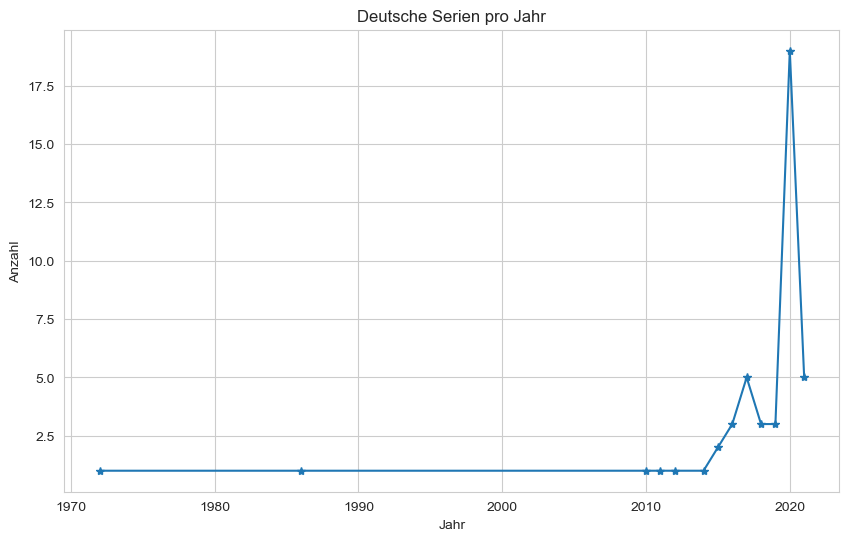

In [21]:
# Basis-Filter: nur deutsche Serien
df_de = df[(df['type'] == 'TV Show') & (df['country'].str.contains('Germany', na=False))]

# 10.1 Anzahl der Serien aus Deutschland
print("Anzahl deutscher Serien:", len(df_de))

# 10.2 Erste 5 Einträge anzeigen
print("\nErste 5 deutsche Serien:")
print(df_de.head(5))

# 10.3 5 aktuellste nach date_added
print("\n5 aktuellste deutsche Serien:")
print(df_de.sort_values(by='date_added', ascending=False).head(5))

# 10.4 Top 3 Genres
print("\nTop 3 Genres deutscher Serien:")
print(df_de['listed_in'].str.split(',').explode().str.strip().value_counts().head(3))

# 10.5 Durchschnittliche Dauer (falls vorhanden)
if 'duration' in df_de.columns:
    dur = df_de['duration'].str.extract('(\d+)').dropna().astype(int)
    print("\nDurchschnittliche Dauer deutscher Serien (Minuten):", round(dur.mean()[0], 2))

# 10.6 Entwicklung pro Jahr (Diagramm)
df_de.groupby('release_year').size().plot(kind='line', marker='*', title='Deutsche Serien pro Jahr')
plt.xlabel('Jahr')
plt.ylabel('Anzahl')
plt.grid(True)  # mit plt.grid(False) explizit deaktivieren
plt.show()

### Erklärung zur Aufgabe 10 - Wichtige Methoden einfach erklärt

**`len(df_de)`**
Gibt die Anzahl der Zeilen im DataFrame `df_de` zurück  
(z. B. Anzahl deutscher Serien nach Filterung).

**`.sort_values(by='date_added', ascending=False)`**
Sortiert nach `date_added`  
`ascending=False` = neueste zuerst.

---

**Genres-Spalte aufbereiten**
1. `.str.split(',')` → trennt am Komma  
   `"Drama, Thriller"` → `['Drama', 'Thriller']`
2. `.explode()` → teilt Liste in einzelne Zeilen  
   Drama  
   Thriller
3. `.str.strip()` → entfernt Leerzeichen  
   `" Thriller"` → `"Thriller"`

---

**Durchschnittliche Dauer**
1. `'duration' in df_de.columns` → prüft, ob `duration` existiert  
2. `.str.extract('(\d+)')` → holt nur Zahl, z. B. `"90 min"` → `90`  
   **`\d+`** = Regex: `\d` = Ziffer, `+` = eine oder mehrere  
3. `.dropna()` → entfernt leere Werte  
4. `.astype(int)` → wandelt in ganze Zahl

---

**`\d+` (Regex)**
Findet alle zusammenhängenden Zahlen im Text  

| Methode                      | Vorteile | Nachteile | Wann verwenden? |
|------------------------------|----------|-----------|-----------------|
| `str.extract('\d+')` (Regex) | Flexibel, funktioniert bei verschiedenen Formaten | Regex-Kenntnisse nötig | Wenn Format nicht immer gleich ist |
| `str.split().str[0]`         | Einfach, gut lesbar | Nur bei fixem Format | Wenn Format immer gleich ist |
| `str.replace(' min', '')`    | Sehr klar, kein Regex nötig | Nur bei exakt passendem Text | Wenn immer derselbe Text entfernt werden muss |

---
**`.plot(...)`**
Erstellt Diagramm (Matplotlib im Hintergrund)  
- `kind='line'` → Liniendiagramm  
- `marker='o'` → Punkte an den Datenpunkten  
- Andere Marker: `'s'` = Quadrat, `'^'` = Dreieck, `'*'` = Stern  

Häufige Diagrammtypen:  
- `'line'` = Linie  
- `'bar'` = Balken  
- `'barh'` = horizontale Balken  
- `'pie'` = Kreisdiagramm


### Aufgabe 11: Durchschnittliche Filmlänge pro Land (Top 5 Länder)
**Frage:**  
Welche 5 Länder haben im Schnitt die längsten Filme (basierend auf der `duration`-Spalte)?  
Sortiere das Ergebnis absteigend nach durchschnittlicher Dauer.

**Hinweise:**  
- Filtere nur `type == 'Movie'`  
- Entferne „min“ aus `duration` (z. B. `"90 min"` → `90`)  
- Konvertiere in `int`  
- Gruppiere nach `country`, berechne den Mittelwert  
- Sortiere absteigend und gib die **Top 5** aus

**Erklärung**
**`avg_duration = movies.groupby('country')['duration_min'].mean()`**  
- `groupby('country')` → gruppiert nach Land  
- `['duration_min']` → wählt die Spalte mit der Filmdauer  
- `.mean()` → berechnet den Durchschnitt pro Land  

Beispiel:  
Germany → (100 + 120) / 2 = 110  
France → (90 + 110) / 2 = 100  
USA → (150) / 1 = 150

In [22]:
# 1. Nur Filme auswählen (mit Kopie)
# 1. Nur Filme auswählen
# .copy() wird verwendet, um SettingWithCopyWarning zu vermeiden
# → wir arbeiten mit einer echten Kopie, nicht nur mit einer Ansicht des ursprünglichen DataFrames
movies = df[df['type'] == 'Movie'].copy()

# 2. Dauer extrahieren (Zahl aus "90 min")
# Wir nehmen .astype(float), weil der Durchschnitt (.mean()) oft keine ganze Zahl ist.
movies['duration_min'] = movies['duration'].str.extract(r'(\d+)').astype(float)

# 3. Nach Land gruppieren und Durchschnitt berechnen
avg_duration = movies.groupby('country')['duration_min'].mean()

# 4. Absteigend sortieren und Top 5 anzeigen
top5_countries = avg_duration.sort_values(ascending=False).head(5)

print(top5_countries)

country
United Kingdom, United States, Japan                   208.0
United States, United Kingdom, Morocco                 205.0
United States, Italy, United Kingdom, Liechtenstein    200.0
New Zealand, United States                             190.0
Romania, France, Switzerland, Germany                  186.0
Name: duration_min, dtype: float64


### Aufgabe 12: Regisseure mit mehreren Genres
**Frage:**  
Welche Regisseure (`director`) haben Titel in mehr als **3 unterschiedlichen Genres** veröffentlicht?

**Hinweise:**  
- Entferne `"Unbekannt"` aus `director`  
- Verwende `.explode()` auf `listed_in`  
- Gruppiere nach `director`  
- Zähle die **einzigartigen Genres**  
- Filtere nur, wo die Anzahl > 3 ist

**Erklärung**
- copy() → vermeidet SettingWithCopyWarning
- str.split(',') + .explode() → Standardmethode, um Listen aus Strings in mehrere Zeilen zu verwandeln
- nunique() → zählt nur einzigartige Werte pro Gruppe
- Klare Trennung in einzelne Schritte → leichter lesbar und debugbar

In [23]:
# Aufgabe 12: Regisseure mit mehr als 3 Genres

# 1. "Unbekannt" entfernen
directors = df[df['director'] != 'Unbekannt'].copy()

# 2. Genres aufteilen
# Beispiel: `"Drama, Thriller"` → `['Drama', 'Thriller']`
directors['genre'] = directors['listed_in'].str.split(',')

# 3. Genres in einzelne Zeilen umwandeln
# Beispiel:  
# Vorher: `"Drama, Thriller"` → `['Drama', 'Thriller']`  
# Nachher: `['Drama', 'Thriller']` 
directors = directors.explode('genre')

# 4. Entfernt unnötige Leerzeichen am Anfang/Ende.
#  Beispiel: `" Thriller"` → `"Thriller"`
directors['genre'] = directors['genre'].str.strip()

# 5. Einzigartige Genres pro Regisseur zählen
# Gruppiert nach `director`.  
#`.nunique()` zählt nur **einzigartige** Genres pro Regisseur.  
#Beispiel: `['Drama', 'Drama', 'Comedy']` → **2**
genre_counts = directors.groupby('director')['genre'].nunique()

# 6. Filtern: mehr als 3 Genres
# Filtert nur Regisseure mit mehr als **3 Genres**.
result = genre_counts[genre_counts > 3]

print(result)


director
A. L. Vijay                                            4
Abba T. Makama                                         4
Abbas Alibhai Burmawalla, Mastan Alibhai Burmawalla    5
Abhinay Deo                                            4
Abhishek Chaubey                                       4
                                                      ..
Zoya Akhtar                                            4
Àlex Pastor, David Pastor                              5
Álex de la Iglesia                                     4
Ömer Faruk Sorak                                       5
Şenol Sönmez                                           4
Name: genre, Length: 394, dtype: int64


###  Aufgabe 13: Entwicklung der Serien-Veröffentlichungen nach Genre
**Frage:**  
Wie hat sich die Anzahl an Serien (`type == 'TV Show'`) im Genre **"Documentaries"** über die Jahre entwickelt?

**Hinweise:**  
- Filtere `type == 'TV Show'`  
- `listed_in` muss `"Documentaries"` enthalten (`.str.contains()`)  
- Gruppiere nach `release_year`  
- Zähle, wie viele es pro Jahr gibt  

**Bonus:**  
- Erstelle ein **Liniendiagramm** für die Entwicklung

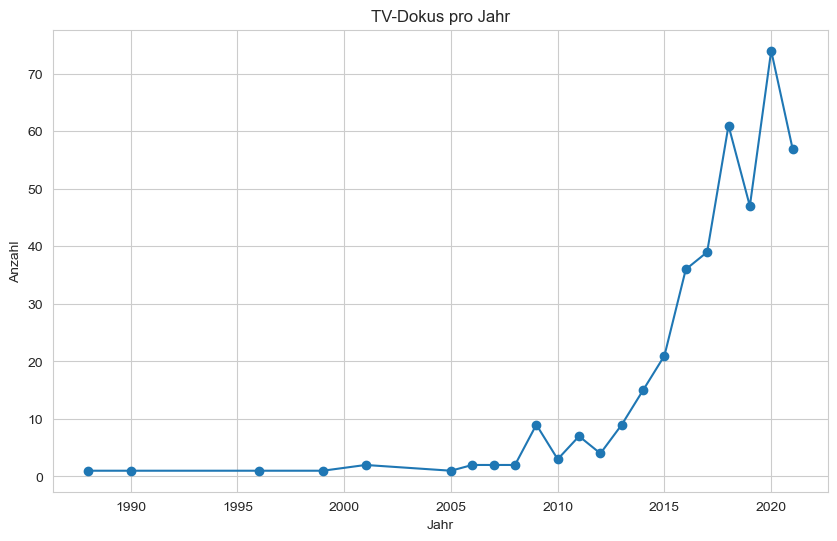

In [24]:
import re, matplotlib.pyplot as plt

(df[df['type'].str.fullmatch('TV Show', case=False, na=False) &
     df['listed_in'].astype(str).str.contains(
         r'\b(?:docu(?:mentary|mentaries|series)?|docs?)\b',
         flags=re.IGNORECASE, na=False, regex=True)]
  .groupby('release_year').size().sort_index()
  .plot(marker='o', title='TV-Dokus pro Jahr')) #macht ein Liniendiagramm und setzt kleine Punkte auf die Werte.

plt.xlabel('Jahr') #Beschriftung der x-Achse.
plt.ylabel('Anzahl') #Beschriftung der y-Achse.
plt.grid(True) #Gitternetz im Diagramm einschalten.
plt.show()

### Erklärung zu Code
### 1. matplotlib.pyplot = Plotten
Matplotlib ist eine Bibliothek in Python zum Zeichnen von Diagrammen.  
`pyplot` ist wie ein „Werkzeugkasten“ mit Befehlen für Linien, Punkte, Balken usw.  
re = Reguläre Ausdrücke (für flexible Textsuche).

```python 
import matplotlib.pyplot as plt
```

Danach kann man z. B. plt.plot(), plt.xlabel() usw. benutzen, um das Diagramm zu gestalten.
💡 Merke: plt = „Stift & Papier“ für Python-Diagramme.

### 2. Zeilen filtern (Maske bauen)
df['type'] `.str.fullmatch`('TV Show', case=False, na=False)
Nimm nur Zeilen, wo type genau „TV Show“ ist.

- case=False = Groß/Kleinschreibung egal.
- na=False = fehlende Werte zählen als „passt nicht“.

**.str.fullmatch()**
.str.fullmatch('TV Show')` prüft, ob der **ganze Text** genau `"TV Show"` ist.

```python
s = pd.Series(['TV Show', 'TV Shows', 'Movie'])
s.str.fullmatch('TV Show')
# Ergebnis: [True, False, False]
```

### Erklärung: `df['listed_in'].astype(str).str.contains(..., flags=re.IGNORECASE, na=False, regex=True)`

- **Suche im Textfeld `listed_in`** nach Wörtern rund um *Doku*.  
- **`astype(str)`** macht sicher, dass wir wirklich in Strings suchen.  
- **`IGNORECASE`** → „documentaries“, „DOCS“, „Docuseries“… alles ok (Groß-/Kleinschreibung egal).  
- **`na=False`** → fehlende Einträge werden ignoriert.  
- **`regex=True`** → das Muster wird als **Regex** interpretiert.
  **`regex=True`** heißt, dass der Suchbegriff ein **Muster** sein darf, nicht nur fester Text.  
  **Beispiel:**
  ```python
  s = pd.Series(['documentary', 'docuseries', 'docs'])
  s.str.contains(r'docu(mentary|series)?', regex=True)


### Das Regex-Muster
`r'\b(?:docu(?:mentary|mentaries|series)?|docs?)\b'`

- **`\b`** = Anfang oder Ende eines Wortes → wir finden nur ganze Wörter wie *docu*, *documentary*, nicht Teile aus *documents*.
- **`(?: ... )`** = Gruppe zum Zusammenfassen, die keinen eigenen Treffer speichert.
- **`docu(?:mentary|mentaries|series)?`** findet:
  - `docu`
  - `documentary`
  - `documentaries`
  - `docuseries`
  Das **`?`** bedeutet: der Teil in der inneren Klammer ist **optional**.
- **`docs?`** = findet `doc` oder `docs` (das **`s?`** bedeutet: „s“ ist optional).

💡 **Ergebnis:** Dieses Muster findet alle *TV Shows*, bei denen im Genre irgendeine Form von „Doku“ vorkommt.  
**Beide Filter werden mit `&` verknüpft → TV-Shows, die irgendeine Doku-Variante im Genre haben.**

**Kompletter Filter-Snippet (ohne Syntax-Highlighting):**

### 3.Pro Jahr zählen
- `.groupby('release_year').size()`
Gruppiert die gefilterten Zeilen nach `release_year` und zählt die Zeilen pro Jahr.

- `.sort_index()`
Sortiert die Jahre aufsteigend, was zu einer besser lesbaren X-Achse in einem Diagramm führt.


### Worauf man achten sollte

- **`release_year`** darf leere Werte (**NaN**) enthalten – diese werden beim Gruppieren automatisch ignoriert.  
- Das aktuelle Suchmuster findet nur die gängigen Doku-Wörter.  
- Wenn dein Datensatz andere Wörter für Dokus hat, musst du sie ins Muster hinzufügen.  

**Beispiel:** Falls im Datensatz auch *biography* als Genre vorkommt, kannst du es so ergänzen:  
```python
r'docu|docs|biography'


